This script calculates number of grid cells reporting number of rainy days and compares them with CHIRPS
Shrad
Fri Jun 15 17:23:54 PDT 2018

In [34]:
from __future__ import division
import xarray as xr
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
def CALC_NUM_RAIN(x):
    return (x>0).sum()

In [14]:
DATADIR = '/home/chg-shrad/DATA/Precipitation_Global/Analysis/Data/'
PLOTDIR = '/home/chg-shrad/DATA/Precipitation_Global/Analysis/Plots/'

In [2]:
CHIRPS_Daily = xr.open_mfdataset('/home/chc-data-out/products/CHIRPS-2.0/global_daily/netcdf/p25/chirps-v2.0.*', autoclose=True, 
                                concat_dim='time')
LIVNEH_Daily = xr.open_mfdataset('/home/chg-shrad/DATA/Atmopheric_forcings/Livneh/CONUS/Daily_forc/Original_res/prec/prec.*',
                                autoclose=True, concat_dim='time')

In [41]:
WATCH_Daily = xr.open_mfdataset('/home/chg-shrad/DATA/Atmopheric_forcings/WATCH/3hourly/clmforc.WFDEI.c2017.0.5x0.5.Prec.*', 
                               autoclose=True, concat_dim='time')

In [11]:
CHIRPS_US_NUMR = CHIRPS_Daily.precip.sel(latitude=slice(25, 52), longitude=slice(235-360, 293-360)).groupby('time.year').apply(CALC_NUM_RAIN)
LIVNEH_NUM_R = LIVNEH_Daily.groupby('time.year').apply(CALC_NUM_RAIN)

In [53]:
WATCH_NUM_R  = WATCH_Daily.PRECTmms.sel(lat=slice(25, 52), lon=slice(235, 293)).groupby('time.year').apply(CALC_NUM_RAIN)

In [13]:
CHIRPS_US_NUMR.to_netcdf(DATADIR + 'Number_of_rainy_grid_cells_US_CHIRPS.nc')
LIVNEH_NUM_R.to_netcdf(DATADIR + 'Number_of_rainy_grid_cells_US_LIVNEH.nc')

/home/shrad/miniconda3/envs/spy/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater
  return func(*args2)


In [55]:
WATCH_NUM_R.to_netcdf(DATADIR + 'Number_of_rainy_grid_cells_US_WATCH.nc')

/home/shrad/miniconda3/envs/spy/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater
  return func(*args2)


In [56]:
CHIRPS_US_NUMR = xr.open_dataset(DATADIR + 'Number_of_rainy_grid_cells_US_CHIRPS.nc')
LIVNEH_NUM_R = xr.open_dataset(DATADIR + 'Number_of_rainy_grid_cells_US_LIVNEH.nc')
CHIRPS_US_NUMR = CHIRPS_US_NUMR.sel(year=CHIRPS_US_NUMR.coords['year']<2018)
WATCH_NUM_R = xr.open_dataset(DATADIR + 'Number_of_rainy_grid_cells_US_WATCH.nc')

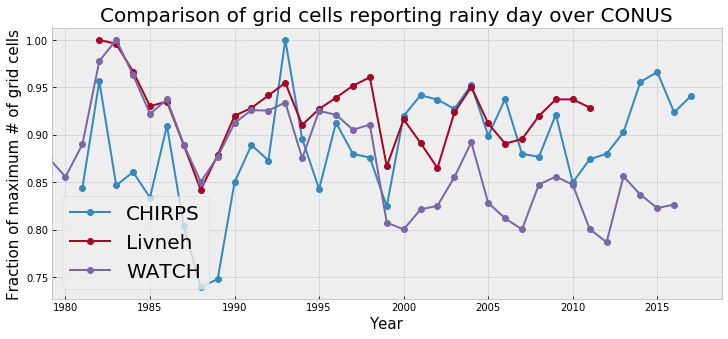

In [57]:
mpl.style.use('bmh')
fig = plt.figure(figsize=(12, 5))
ax=fig.add_subplot(111)
(CHIRPS_US_NUMR.precip/CHIRPS_US_NUMR.precip.max()).plot(label='CHIRPS', marker='o')
(LIVNEH_NUM_R.prec/LIVNEH_NUM_R.prec.max()).plot(label='Livneh', marker='o')
(WATCH_NUM_R.PRECTmms/WATCH_NUM_R.PRECTmms.max()).plot(label='WATCH', marker='o')
plt.legend(loc='best', fontsize=20)
plt.ylabel('Fraction of maximum # of grid cells', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.title('Comparison of grid cells reporting rainy day over CONUS', fontsize=20)
Figure = PLOTDIR + '/' + 'Number_of_rainy_days_CHIRPS_vs_WATCH_vs_Livneh_CONUS.png'
plt.savefig(Figure, dpi=150, format='png', bbox_inches='tight')